### Exercises

#### Question 1

Alongside this notebook is a file `daily_quotes.csv` (the same one that we used for the Pandas exercises).

Using this data write a function that generates a composite of line charts (2 columns wide), that charts the closing price for each symbol in the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\swapn\AppData\Local\Temp\ipykernel_21184\1711859603.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(


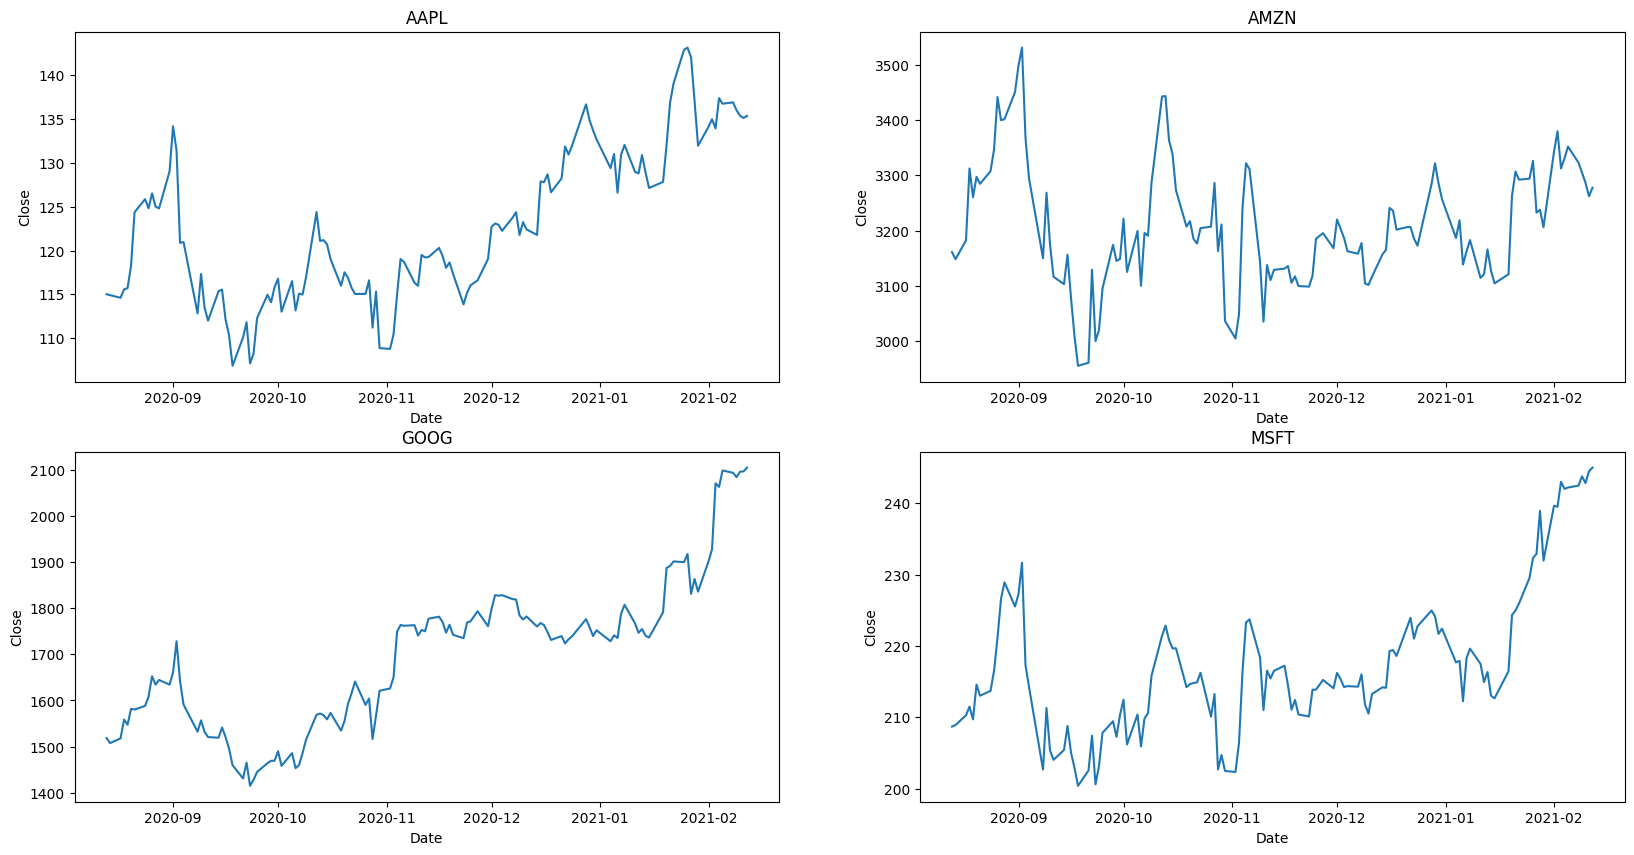

In [2]:
def plot_closing_data(data):
    fig, axes = plt.subplots(2, 2, figsize=(20, 10))

    for ax, symbol in zip(axes.flatten(), df.index.unique()):
        ax.plot(df.loc[symbol, "Date"], df.loc[symbol, " Close/Last"])
        ax.set_title(symbol)
        ax.set_xlabel("Date")
        ax.set_ylabel("Close")


df = pd.read_csv(
    "daily_quotes.csv",
    index_col=0,
    usecols=[0, 1, 2],
    parse_dates=[1],
)

plot_closing_data(df)

### Question 2

Expand on your previous function to include an `n`-day moving average on each chart. (When you calculate the moving average, be careful with the order of the data in each subset of data).

C:\Users\swapn\AppData\Local\Temp\ipykernel_21184\213226833.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(


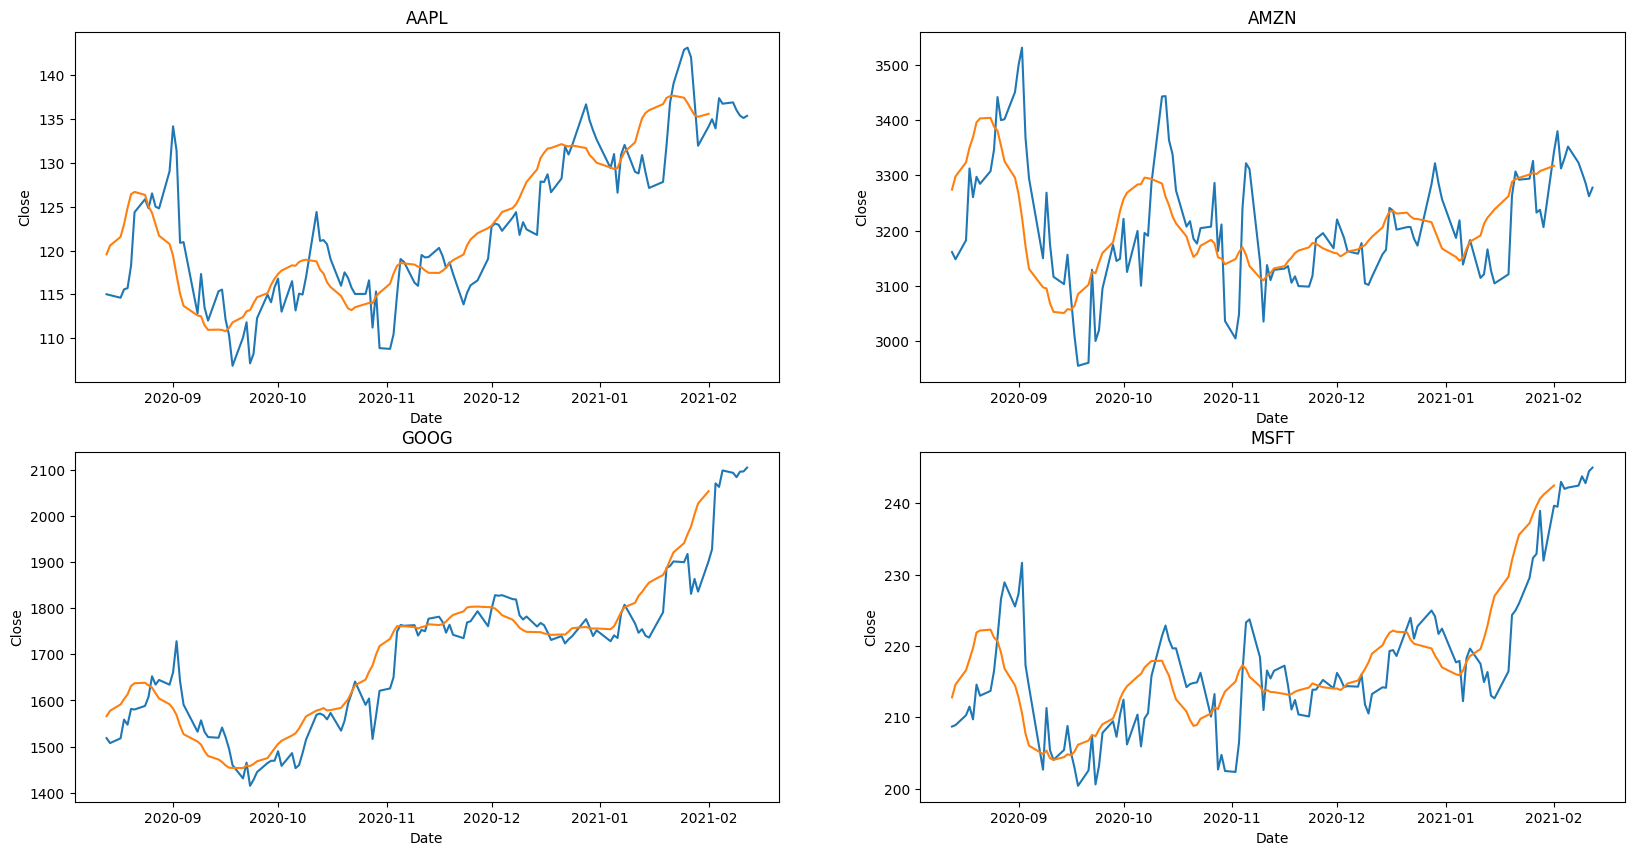

In [3]:
def moving_average(data, n_days):
    fig, axes = plt.subplots(2, 2, figsize=(20, 10))

    for ax, symbol in zip(axes.flatten(), df.index.unique()):
        ax.plot(df.loc[symbol, "Date"], df.loc[symbol, " Close/Last"])
        ax.plot(df.loc[symbol, "Date"], df.loc[symbol, " Close/Last"].rolling(window=n_days).mean())
        ax.set_title(symbol)
        ax.set_xlabel("Date")
        ax.set_ylabel("Close")


df = pd.read_csv(
    "daily_quotes.csv",
    index_col=0,
    usecols=[0, 1, 2],
    parse_dates=[1],
)

moving_average(df, 10)

#### Question 3

Using the previous charts, add horizontal lines for the 25th, 50th and 75th percentiles of the close price (calculated over the entire time period).

C:\Users\swapn\AppData\Local\Temp\ipykernel_21184\981415411.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(


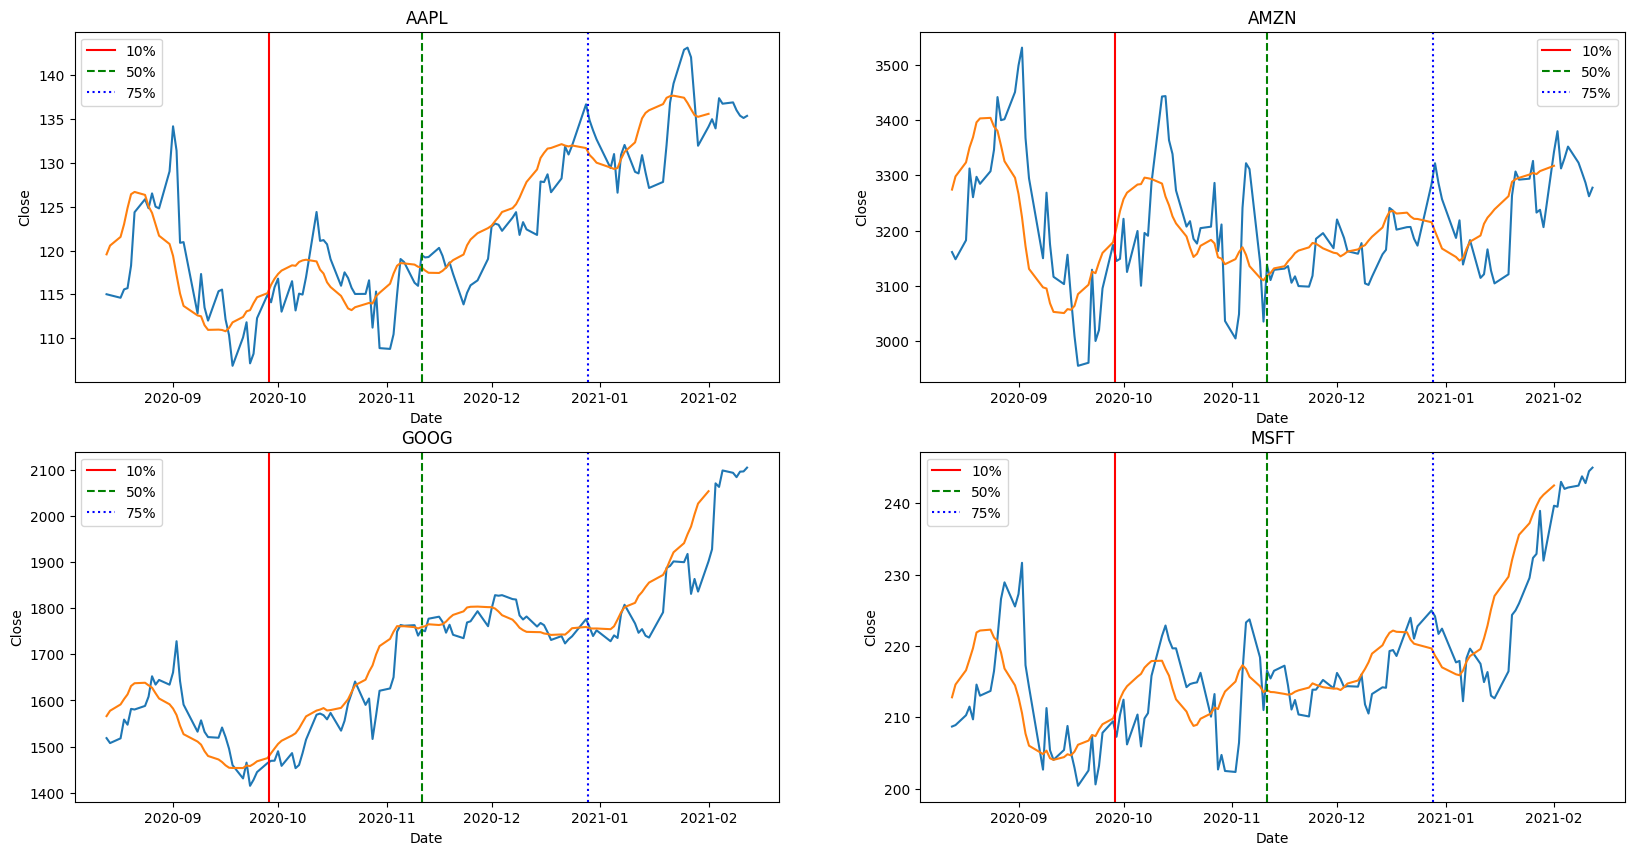

In [4]:
def moving_average(data, n_days):
    fig, axes = plt.subplots(2, 2, figsize=(20, 10))

    for ax, symbol in zip(axes.flatten(), df.index.unique()):
        percentiles = [np.percentile(df.loc[symbol, "Date"], p) for p in (25, 50, 75)]
        ax.plot(df.loc[symbol, "Date"], df.loc[symbol, " Close/Last"])
        ax.plot(df.loc[symbol, "Date"], df.loc[symbol, " Close/Last"].rolling(window=n_days).mean())
        ax.axvline(percentiles[0], linestyle="-", color="red", label="10%")
        ax.axvline(percentiles[1], linestyle="--", color="green", label="50%")
        ax.axvline(percentiles[2], linestyle=":", color="blue", label="75%")
        ax.set_title(symbol)
        ax.set_xlabel("Date")
        ax.set_ylabel("Close")
        ax.legend()


df = pd.read_csv(
    "daily_quotes.csv",
    index_col=0,
    usecols=[0, 1, 2],
    parse_dates=[1],
)

moving_average(df, 10)